## data loading ##

In [48]:
import pandas as pd

# Define file path
file_path = r"C:\Users\user\Desktop\Future Interns\Road Accident\Road Accident Data.xlsx"

# Load the Excel file
df = pd.read_excel(file_path)

# Display column names
print("Columns in the dataset:")
print(df.columns)

# Display the first few rows
print("\nPreview of the dataset:")
print(df.head())


Columns in the dataset:
Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

Preview of the dataset:
  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0      BS0000001    2021-01-01    Thursday  Give way or uncontrolled   
1      BS0000002    2021-01-05      Monday  Give way or uncontrolled   
2      BS0000003    2021-01-04      Sunday  Give way or uncontrolled   
3      BS0000004    2021-01-05      Monday       Auto traffic signal   
4      BS0000005    2021-01-06     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \


In [57]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


## data preprocessing ##

In [58]:
# Display unique values in the Accident_Severity column
unique_severity = df['Accident_Severity'].unique()
print(unique_severity)


['Serious' 'Slight' 'Fetal' 'Fatal']


In [59]:
# Replace 'Fetal' with 'Fatal' in the Accident_Severity column
df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal', 'Fatal')

# Verify the unique values again
print(df['Accident_Severity'].unique())


['Serious' 'Slight' 'Fatal']


In [60]:
import pandas as pd

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]

# Print the results
print("🔹 Missing Values in Each Column:")
print(missing_values)

# Optional: Show percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print("\n🔹 Missing Values (Percentage):")
print(missing_percentage)


🔹 Missing Values in Each Column:
Series([], dtype: int64)

🔹 Missing Values (Percentage):
Series([], dtype: float64)


In [ ]:
# Drop 'Carriageway_Hazards' column due to high missing values
df.drop(columns=['Carriageway_Hazards'], inplace=True)

# Fill missing 'Time' values with the most common time (mode)
#df['Time'].fillna(df['Time'].mode()[0], inplace=True)
# Drop 'Time' since it's not needed for modeling
#df.drop(columns=['Time'], inplace=True)
# Drop rows where 'Time' is missing
df = df.dropna(subset=['Time'])

# Verify missing values again
print("🔹 Missing Values After Cleaning:")
print(df.isnull().sum())


In [62]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [41]:
# Convert Date and Time columns to correct format
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Convert numeric columns to proper type
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df['Speed_limit'] = df['Speed_limit'].astype(int)
df['Number_of_Casualties'] = df['Number_of_Casualties'].astype(int)
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].astype(int)

# Convert categorical columns to string for proper visualization
categorical_cols = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 
                    'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)', 
                    'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 
                    'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
df[categorical_cols] = df[categorical_cols].astype(str)

# Verify Data Types
print(df.dtypes)


Accident_Index                        object
Accident Date                 datetime64[ns]
Day_of_Week                           object
Junction_Control                      object
Junction_Detail                       object
Accident_Severity                     object
Latitude                             float64
Light_Conditions                      object
Local_Authority_(District)            object
Longitude                            float64
Number_of_Casualties                   int32
Number_of_Vehicles                     int32
Police_Force                          object
Road_Surface_Conditions               object
Road_Type                             object
Speed_limit                            int32
Time                                  object
Urban_or_Rural_Area                   object
Weather_Conditions                    object
Vehicle_Type                          object
dtype: object


In [63]:
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()


Duplicates: 0


In [64]:
print(df.isnull().sum())


Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64


In [65]:
# Define new file path for the cleaned dataset
cleaned_file_path = r"C:\Users\user\Desktop\Future Interns\Road Accident\Cleaned_Accident_Data.xlsx"

# Save cleaned data to a new Excel file
df.to_excel(cleaned_file_path, index=False, engine="openpyxl")

print(" Cleaned data saved successfully as a separate Excel file!")


 Cleaned data saved successfully as a separate Excel file!


In [67]:
# Load the cleaned dataset
df_cleaned = pd.read_excel(cleaned_file_path, engine="openpyxl")

# Display the first few rows
df_cleaned.head()


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [68]:
# Display unique values in the Accident_Severity column
unique_severity = df_cleaned['Accident_Severity'].unique()
print(unique_severity)


['Serious' 'Slight' 'Fatal']


In [56]:
df_cleaned.head()

,Accident_Index,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,...,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Year,Accident_Month,Accident_Day,Accident_Weekday
0,0,4,4,8,2,51.512273,4,185,-0.201349,1,...,1,30,910,1,1,2,2021,1,1,4
1,1,1,4,0,2,51.514399,4,185,-0.199248,11,...,3,30,658,1,1,13,2021,1,5,1
2,2,3,4,8,3,51.486668,4,185,-0.179599,1,...,3,30,858,1,1,13,2021,1,4,0
3,3,1,2,8,2,51.507804,4,185,-0.203110,1,...,3,30,489,1,3,9,2021,1,5,1
4,4,5,2,0,2,51.482076,1,185,-0.173445,1,...,3,30,1044,1,1,2,2021,1,6,2


In [46]:
print(df_cleaned.isnull().sum())

Accident_Index                0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
Accident_Year                 0
Accident_Month                0
Accident_Day                  0
Accident_Weekday              0
dtype: int64


## Exploratory Data Analysis (EDA) ##

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
file_path = r"C:\Users\user\Desktop\Future Interns\Road Accident\Cleaned_Accident_Data.xlsx"
df_cleaned = pd.read_excel(file_path)

# 🔹 View basic statistics
print(df_cleaned.describe())

                       Accident Date       Latitude      Longitude  \
count                         307956  307956.000000  307956.000000   
mean   2021-12-23 22:37:44.396212480      52.486758      -1.368811   
min              2021-01-01 00:00:00      49.914488      -7.516225   
25%              2021-06-28 00:00:00      51.485234      -2.247849   
50%              2021-12-08 00:00:00      52.225810      -1.349160   
75%              2022-06-25 00:00:00      53.415420      -0.206801   
max              2022-12-31 00:00:00      60.598055       1.759398   
std                              NaN       1.338630       1.356082   

       Number_of_Casualties  Number_of_Vehicles    Speed_limit  
count         307956.000000       307956.000000  307956.000000  
mean               1.356889            1.829066      38.865715  
min                1.000000            1.000000      10.000000  
25%                1.000000            1.000000      30.000000  
50%                1.000000            2.000

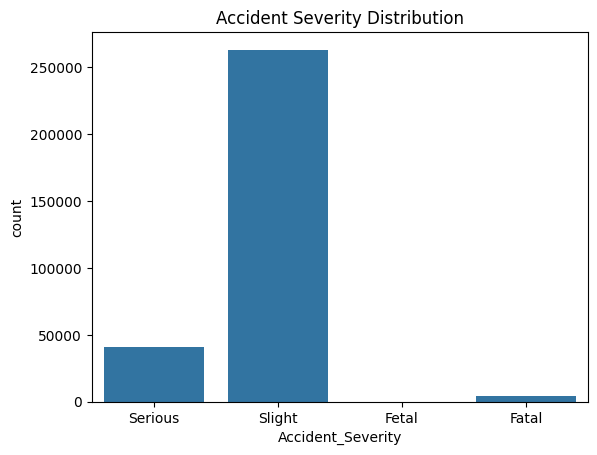

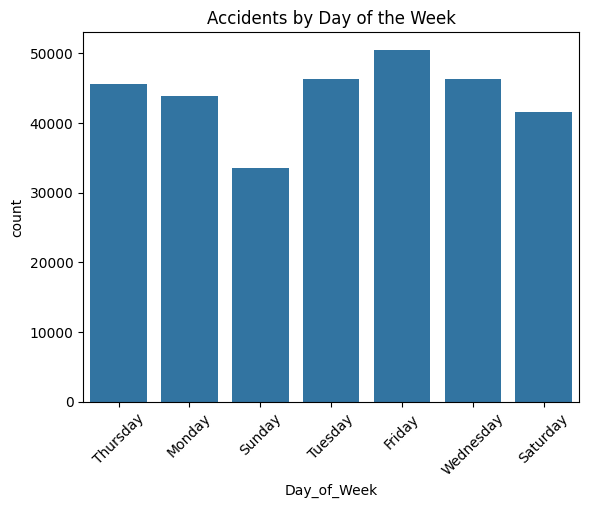

Top 10 High-Risk Locations:
 Local_Authority_(District)
Birmingham          6165
Leeds               4140
Manchester          3132
Bradford            3006
Westminster         2811
Sheffield           2750
Liverpool           2611
Cornwall            2606
Barnet              2302
Bristol, City of    2270
Name: count, dtype: int64


In [26]:
# 🔹 Check accident severity distribution
sns.countplot(x="Accident_Severity", data=df_cleaned)
plt.title("Accident Severity Distribution")
plt.show()

# 🔹 Check accidents by day of the week
sns.countplot(x="Day_of_Week", data=df_cleaned)
plt.title("Accidents by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# 🔹 Top accident-prone locations
top_locations = df_cleaned["Local_Authority_(District)"].value_counts().head(10)
print("Top 10 High-Risk Locations:\n", top_locations)


## model building, model training, and model evaluation ##

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import numpy as np

In [29]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])


In [31]:
datetime_cols = df_cleaned.select_dtypes(include=['datetime64']).columns
print(datetime_cols)


Index(['Accident Date'], dtype='object')


In [33]:
# Encode 'Accident_Severity' (Target Variable)
le = LabelEncoder()
df_cleaned['Accident_Severity'] = le.fit_transform(df_cleaned['Accident_Severity'])

# Splitting features and target variable
X = df_cleaned.drop(columns=['Accident_Severity'])  # Features
y = df_cleaned['Accident_Severity']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Option 1: Apply SMOTE for balancing (oversampling minority classes)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Function to train Random Forest
def train_rf_model(data, target_variable, n_estimators, use_smote=True):
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE if enabled
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    # Initialize RandomForestClassifier with balanced weights
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, class_weight='balanced')

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf_model.predict(X_test)

    # Evaluate performance
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')

    return rf_model, {'Accuracy': accuracy, 'F1 Score': f1}


In [34]:
# Train and evaluate models with different estimators
estimators_list = [50, 100, 200]
results = {}

for n in estimators_list:
    model, metrics_result = train_rf_model(df_cleaned, 'Accident_Severity', n)
    results[f"{n} trees"] = metrics_result

# Show results
print(results)

# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)
print(importances)


{'50 trees': {'Accuracy': 0.8133848551759969, 'F1 Score': 0.7905464444732664}, '100 trees': {'Accuracy': 0.8168106247564618, 'F1 Score': 0.7912804945902646}, '200 trees': {'Accuracy': 0.8185153916092999, 'F1 Score': 0.7915965729711053}}
Accident_Index                0.219399
Longitude                     0.103271
Latitude                      0.089625
Speed_limit                   0.065844
Local_Authority_(District)    0.052822
Police_Force                  0.051791
Time                          0.049063
Accident_Month                0.038467
Accident_Day                  0.033741
Urban_or_Rural_Area           0.033529
Junction_Detail               0.032325
Day_of_Week                   0.031232
Number_of_Vehicles            0.030298
Accident_Weekday              0.027690
Junction_Control              0.023684
Light_Conditions              0.021807
Road_Surface_Conditions       0.020771
Weather_Conditions            0.016678
Vehicle_Type                  0.016408
Accident_Year         

## Model to Predict Accident Severity ##

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert target labels (e.g., 'Fatal', 'Serious') to numeric
y_encoded = label_encoder.fit_transform(y)

# Mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Now split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


Label Mapping: {0: 0, 1: 1, 2: 2, 3: 3}


In [30]:
print("Label Mapping:", label_mapping)
print("Unique Classes in y_train:", set(y_train))


Label Mapping: {0: 0, 1: 1, 2: 2, 3: 3}
Unique Classes in y_train: {0, 1, 2, 3}


In [32]:
from imblearn.over_sampling import SMOTE

# Get class counts before resampling
from collections import Counter
class_counts = Counter(y_train)
print("Original Class Distribution:", class_counts)

# Adjust SMOTE strategy to ensure requested samples ≥ original count
smote_strategy = {
    0: max(3000, class_counts[0]),  # Ensure at least the original count
    1: max(3000, class_counts[1]),  
    2: max(10000, class_counts[2])
}

smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled Class Distribution:", Counter(y_resampled))


Original Class Distribution: Counter({3: 210624, 2: 32592, 0: 3123, 1: 39})
Resampled Class Distribution: Counter({3: 210624, 2: 32592, 0: 3123, 1: 3000})


In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Print original class distribution
class_counts = Counter(y_train)
print("Original Class Distribution:", class_counts)

# Ensure oversampling is valid
smote_strategy = {
    0: max(5000, class_counts[0]),  # Increase Fatal cases to 5000
    1: max(5000, class_counts[1]),  # Increase Fetal cases to 5000
    2: max(15000, class_counts[2])  # Increase Serious cases to 15,000
}

smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print resampled class distribution
print("Resampled Class Distribution:", Counter(y_resampled))


Original Class Distribution: Counter({3: 210624, 2: 32592, 0: 3123, 1: 39})
Resampled Class Distribution: Counter({3: 210624, 2: 32592, 0: 5000, 1: 5000})


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate Model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8102768081824824
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.03      0.03       781
           1       0.00      0.00      0.00        10
           2       0.20      0.09      0.12      8148
           3       0.86      0.93      0.90     52656

    accuracy                           0.81     61595
   macro avg       0.27      0.26      0.26     61595
weighted avg       0.76      0.81      0.78     61595



In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define correct class distribution for oversampling
smote = SMOTE(sampling_strategy={0: 10000, 1: 5000}, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Resampled Class Distribution:", Counter(y_resampled))


Resampled Class Distribution: Counter({3: 210624, 2: 32592, 0: 10000, 1: 5000})
